## [ Part 4 시각화 도구 ]


### 교재 복습 <hr>
#### 1. Matplotlib - 기본 그래프 도구

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_excel('../DATA/시도별 전출입 인구수.xlsx')

df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [45]:
## 1-1 선 그래프
# 누락 값(NaN)을 앞 데이터로 채우기
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [46]:
# 서울에서 다른 지역으로 이동한 데이터만
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis='columns')
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis='columns')
df_seoul =df_seoul.set_index('전입지')
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [47]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

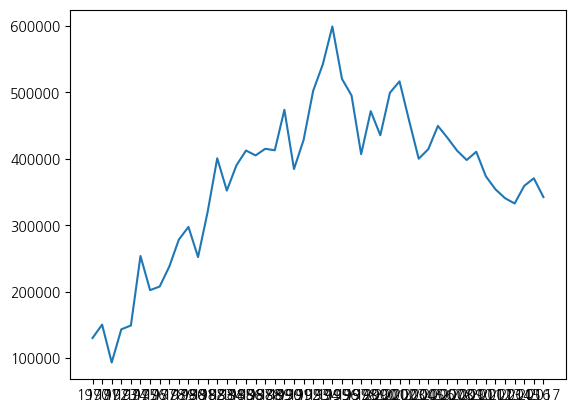

In [48]:
# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

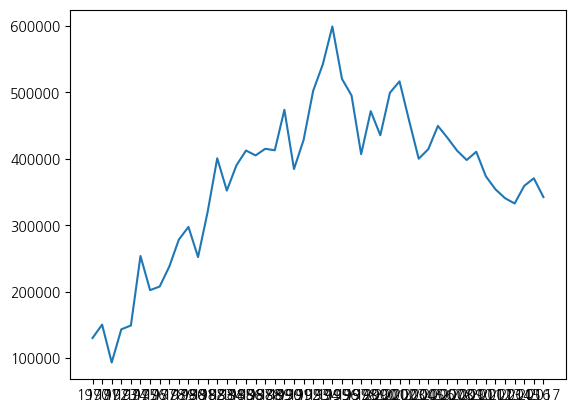

In [49]:
plt.plot(sr_one)
plt.show()      ## 객체가 표시되지 않고 그림만 표시됨

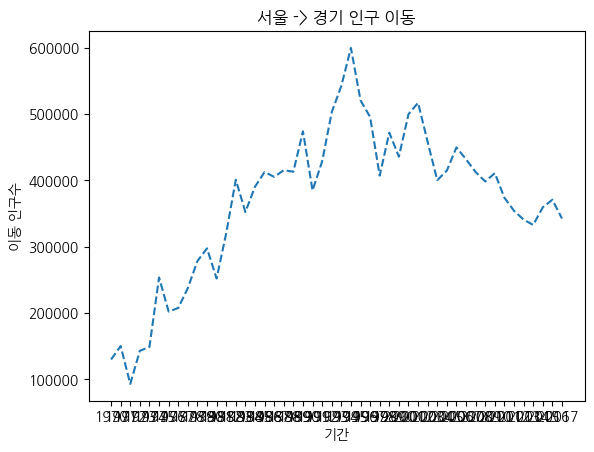

In [50]:
plt.plot(sr_one.index, sr_one.values, linestyle='--')
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()              ## 변경사항을 저장하고 그래프 출력

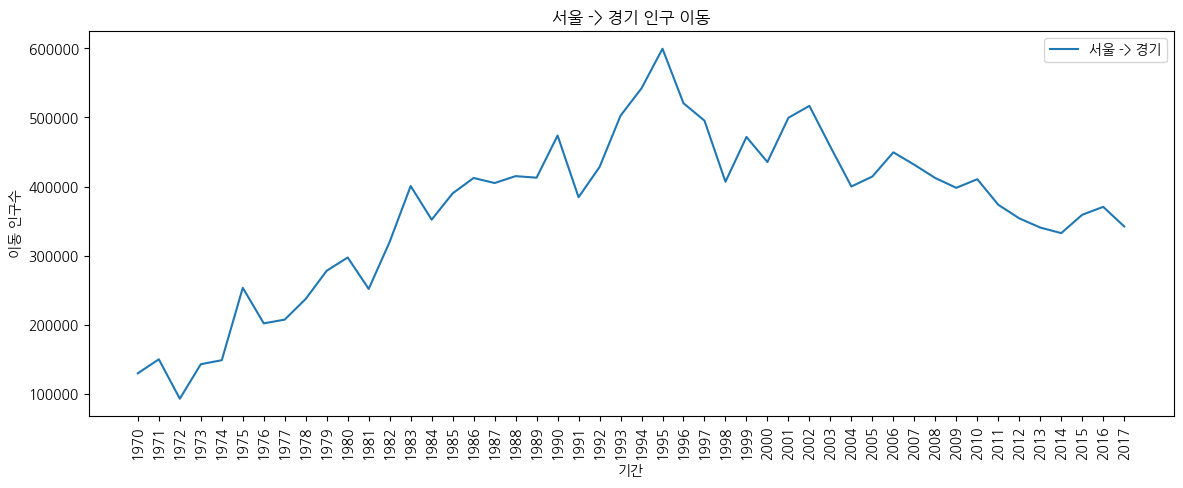

In [53]:
# 그래프 꾸미기
plt.figure(figsize=(14,5))      ## 창 사이즈
plt.xticks(rotation='vertical') ## x축 레이블 오른쪽 수직으로 회전
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best') ## best는 최적의 장소를 자동으로 선택함 

plt.show()             

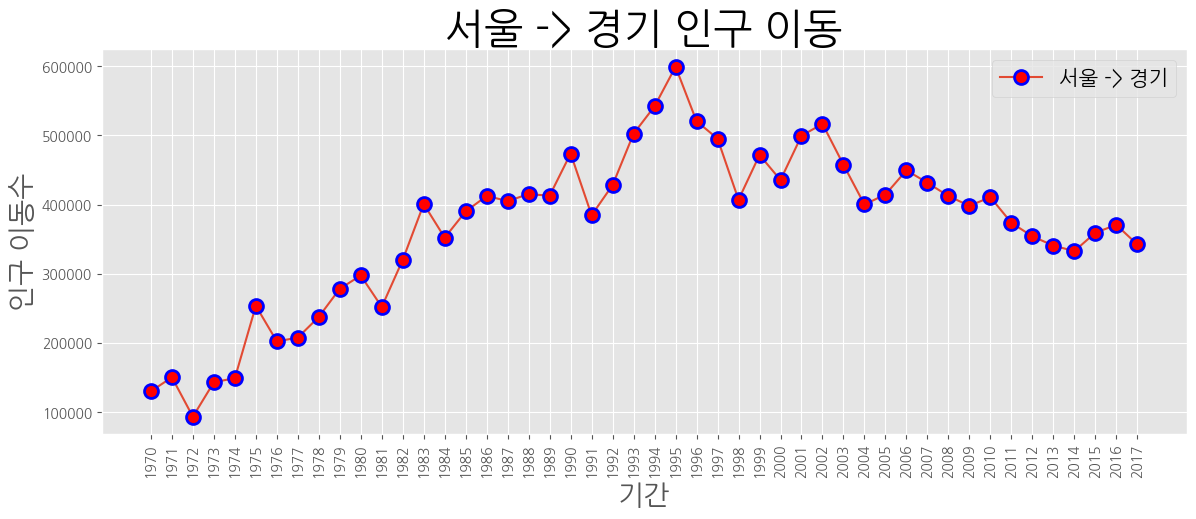

In [56]:
# 스타일 서식 지정
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values,
         marker='o',
         markerfacecolor='red',
         markeredgecolor='blue',
         markeredgewidth=2,
         markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('인구 이동수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.show()

<hr>

In [58]:
## 
df = pd.read_csv('../DATA/삼성전자_분기별_매출액.csv')
df = df.sort_values('quarter')
df.head()

,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2


In [59]:
fig = plt.figure()
print(fig)

Figure(640x480)


<Figure size 640x480 with 0 Axes>